This notebook calculates how important the input features are to the models usign Extra trees regressor.

In [3]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn     
import seaborn as sns
import matplotlib 
from pandas import DataFrame
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv('../../../Datasets/augmented_data.csv')

In [9]:
input_col = ['Growth Temp (Celsius)', 'Metal_mmol (mmol)', 'Chalcogen_mmol (mmol)',
             'Amines_mmol (mmol)', 'CA_mmol (mmol)', 'Phosphines_mmol (mmol)', 
             'S_I_amount (g)', 'S_II_amount (g)', 'Time_min (min)', 
             'x0_cadmium acetate', 'x0_cadmium acetate dihydrate', 
             'x0_cadmium oxide', 'x0_cadmium stearate', 'x0_dimethylcadmium', 
             'x1_None', 'x1_benzoic acid', 'x1_dodecylphosphonic acid', 
             'x1_ethylphosphonic acid', 'x1_lauric acid', 
             'x1_myrstic acid', 'x1_oleic acid', 'x1_stearic acid',
             'x2_2-6-dimethylpyridine', 'x2_None', 'x2_aniline', 
             'x2_benzylamine', 'x2_dioctylamine/hexadecylamine',
             'x2_dodecylamine', 'x2_heptylamine', 'x2_hexadecylamine', 
             'x2_octadecylamine', 'x2_octylamine', 'x2_oleylamine', 
             'x2_pyridine', 'x2_trioctylamine', 'x3_None', 'x3_diphenylphosphine', 
             'x3_tributylphosphine', 'x3_trioctylphosphine', 
             'x3_triphenylphosphine', 'x4_None', 'x4_liquid parafin', 
             'x4_octadecene', 'x4_phenyl ether', 'x4_trioctylphosphine oxide', 
             'x5_None', 'x5_phosphinic acid', 'x5_trioctylphosphine oxide'
            ]

output_col = ['Diameter_nm','Absorbance max (nm)', 'PL max (nm)']

X = df[input_col]

y = df[output_col]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, shuffle=True)

In [10]:
#Run Regression
ET_reg = ExtraTreesRegressor(n_estimators=3,
                            max_features=8,     
                            random_state=44).fit(X_train, y_train)
            
            
ET_y_pred = ET_reg.predict(X_test)

outputs = ('diameter: ', 'Abs: ', 'PL: ')
for i in range(0, 3):
    ET_r2 = r2_score(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    ET_MSE = mean_squared_error(y_test.iloc[:, i], pd.DataFrame(ET_y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE )

diameter:  r2: 0.8113666509442224 ; MSE: 0.49611103917257676
Abs:  r2: 0.9397746426000377 ; MSE: 363.20520094562653
PL:  r2: 0.7816866157468844 ; MSE: 467.1041395883966


In [7]:
y_test['Diameter_nm'].values

array([1.67  , 1.67  , 8.3   , 2.32  , 3.7   , 3.6297, 2.4731, 3.6   ,
       4.5   , 1.79  , 2.17  , 1.13  , 3.66  , 3.15  , 2.13  , 4.0901,
       1.97  , 2.84  , 4.5   , 2.02  , 2.13  , 3.5   , 5.25  , 1.9   ,
       3.    , 1.9   , 2.6   , 2.7   , 1.98  , 2.5   , 3.2   , 3.161 ,
       2.    , 1.33  , 3.43  , 3.86  , 3.41  , 4.4   , 1.9138, 1.74  ,
       4.74  , 1.6   , 3.8   , 2.8   , 6.5   , 1.7   , 9.08  ])

In [13]:
# Prints out the MAE and RMSE Values for Literature Comparison
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ET_y_pred))

Mean Absolute Error: 8.721632792907801


## Plotting 

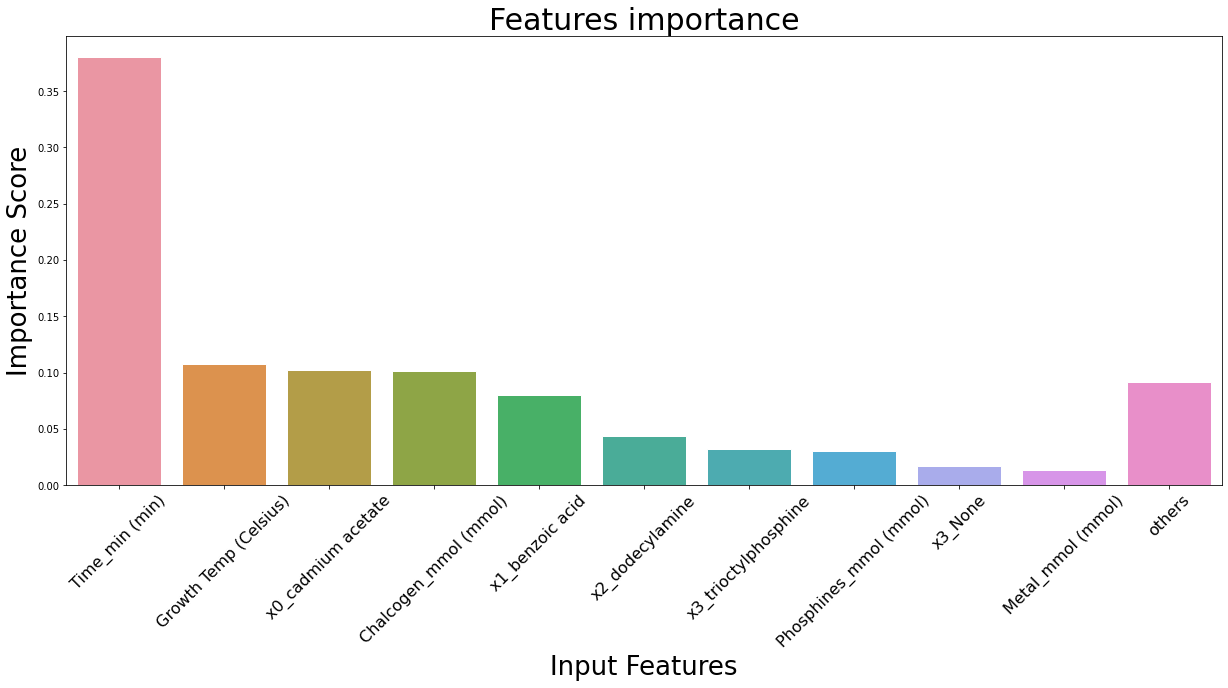

In [14]:
# Depositing the input features and their importance score into a dicitonary
importance_dict = dict()
for i in range(0,48):
    importance_dict[input_col[i]] = ET_reg.feature_importances_[i]

# Sorting the input features by their importance score    
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
# Filtering out input features with the best importance score
top10 = DataFrame(sorted_importance[0:10], columns=['features', 'importance score'])
# Combining the other input features
others2 = DataFrame(sorted_importance[10:], columns=['features', 'importance score'])
combined_others2 = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others2['importance score'].sum()]
                                        })
# Combining top 10 with others
imp_score2 = pd.concat([top10, combined_others2])

# Plotting 

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.set_theme(style="whitegrid")

plt.xticks(rotation=45, fontsize=16)

ax.set_title('Features importance', fontsize=30)

ax = sns.barplot(x="features", y="importance score", data=imp_score2)

ax.set_xlabel('Input Features', fontsize=26)
ax.set_ylabel('Importance Score', fontsize=26)

plt.show()